In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# # Copy the dataset images to a diff folder

# import os
# import shutil

# src_dir = '/kaggle/input/leapgestrecog/leapGestRecog'
# dest_dir = '/kaggle/input/leapgestrecog/leapGestRecogprocessed_data'

# if not os.path.exists(dest_dir):
#     os.makedirs(dest_dir)

# for i in range(10):
#     dirs = str(i).zfill(2)
#     dirs_path = os.path.join(src_dir, dirs)

#     if os.path.exists(dirs_path):
#         for sub_dir in ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']:
#             subdir_path = os.path.join(dirs_path, sub_dir)

#             if os.path.exists(subdir_path):
#                 dest_subdir_path = os.path.join(dest_dir, sub_dir)
#                 if not os.path.exists(dest_subdir_path):
#                     os.makedirs(dest_subdir_path)
#                 for file_name in os.listdir(subdir_path):
#                     src_file_path = os.path.join(subdir_path, file_name)
#                     dst_file_path = os.path.join(dest_subdir_path, file_name)
#                     shutil.copy2(src_file_path, dst_file_path)
#                     print(f"Copied '{src_file_path}' to '{dst_file_path}'")


In [ ]:
IMAGE_SIZE = (100, 100)
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
data_dir = '/kaggle/input/leapgestrecog/leapGestRecog/processed_data'

In [ ]:
category_labels = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [ ]:
train = datagen.flow_from_directory(data_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training', classes=category_labels)

validation = datagen.flow_from_directory(data_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation', classes=category_labels)

Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(category_labels), activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 10, 10, 128)      

In [ ]:
with tf.device('/device:GPU:0'):
  model_fit = model.fit(train, steps_per_epoch=train.samples // BATCH_SIZE, epochs=EPOCHS, validation_data=validation, validation_steps=validation.samples // BATCH_SIZE)

Epoch 1/10
500/500 [==============================] - 97s 188ms/step - loss: 1.0142 - accuracy: 0.6335 - val_loss: 0.5971 - val_accuracy: 0.8035
Epoch 2/10
500/500 [==============================] - 95s 189ms/step - loss: 0.3471 - accuracy: 0.8803 - val_loss: 0.2638 - val_accuracy: 0.9133
Epoch 3/10
500/500 [==============================] - 95s 189ms/step - loss: 0.2226 - accuracy: 0.9247 - val_loss: 0.3297 - val_accuracy: 0.9018
Epoch 4/10
500/500 [==============================] - 97s 193ms/step - loss: 0.1665 - accuracy: 0.9440 - val_loss: 0.2234 - val_accuracy: 0.9275
Epoch 5/10
500/500 [==============================] - 96s 193ms/step - loss: 0.1257 - accuracy: 0.9587 - val_loss: 0.1867 - val_accuracy: 0.9492
Epoch 6/10
500/500 [==============================] - 94s 188ms/step - loss: 0.1142 - accuracy: 0.9634 - val_loss: 0.2080 - val_accuracy: 0.9467
Epoch 7/10
500/500 [==============================] - 96s 193ms/step - loss: 0.1010 - accuracy: 0.9684 - val_loss: 0.2002 - val_ac

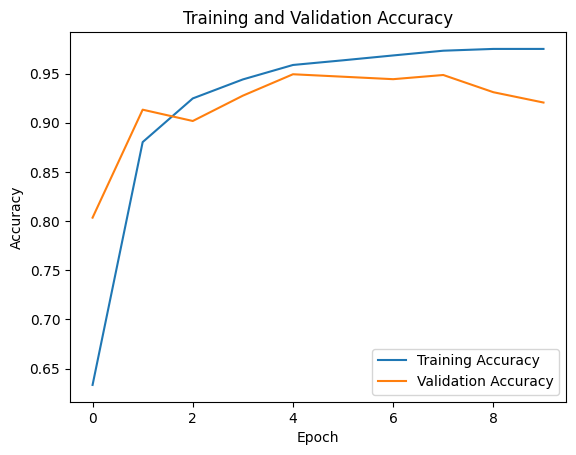

In [ ]:
plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
test_img_path = '/kaggle/input/leapgestrecog/leapGestRecog/00/03_fist/frame_00_03_0006.png'

test_img = tf.keras.preprocessing.image.load_img(test_img_path, target_size=IMAGE_SIZE)
test_img_arr = tf.keras.preprocessing.image.img_to_array(test_img)
test_img_arr = np.expand_dims(test_img_arr, axis=0)
test_img_arr /= 255.

prediction = model.predict(test_img_arr)
predicted_class_index = np.argmax(prediction)
predicted_class = category_labels[predicted_class_index]

1/1 [==============================] - 0s 72ms/step


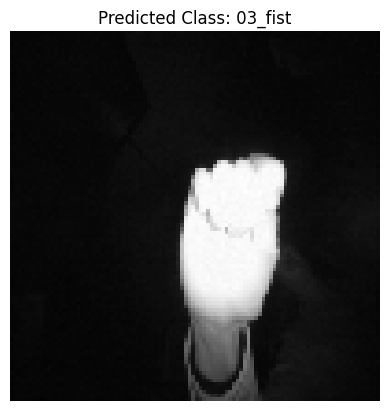

In [ ]:
plt.imshow(test_img)
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()